#Data Loading and Initial Exploration:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

# Load the data
df = pd.read_csv('CIB_synthetic_data (1).csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      1895 non-null   int64  
 1   Date                1895 non-null   object 
 2   Client_ID           1895 non-null   int64  
 3   Account_Number      1895 non-null   int64  
 4   Transaction_Type    1895 non-null   object 
 5   Amount              1895 non-null   float64
 6   Currency            1895 non-null   object 
 7   Exchange_Rate       1895 non-null   float64
 8   Amount_in_USD       1895 non-null   float64
 9   Client_Sector       1895 non-null   object 
 10  Client_Industry     1895 non-null   object 
 11  Region              1895 non-null   object 
 12  Country             1895 non-null   object 
 13  City                1895 non-null   object 
 14  Branch_Code         1895 non-null   int64  
 15  Transaction_Status  1895 non-null   object 
 16  Employ

#Exploratory Data Analysis (EDA) and Visualization:

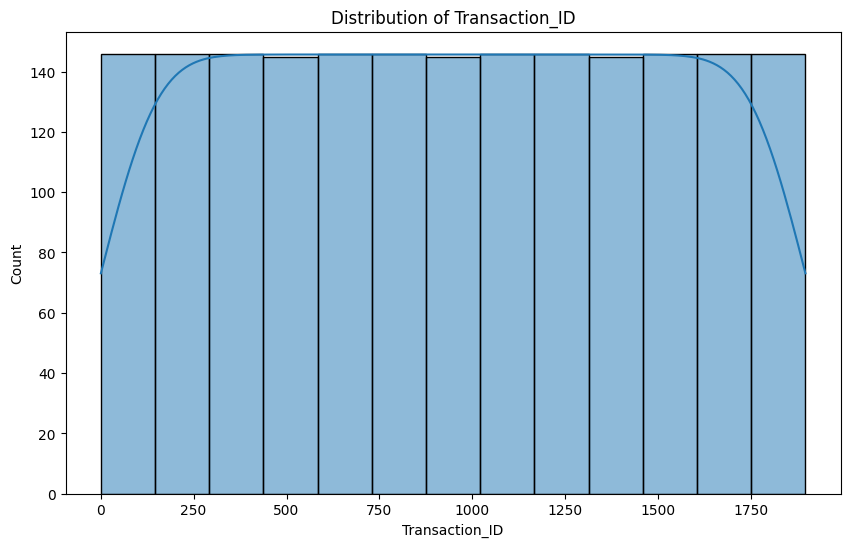

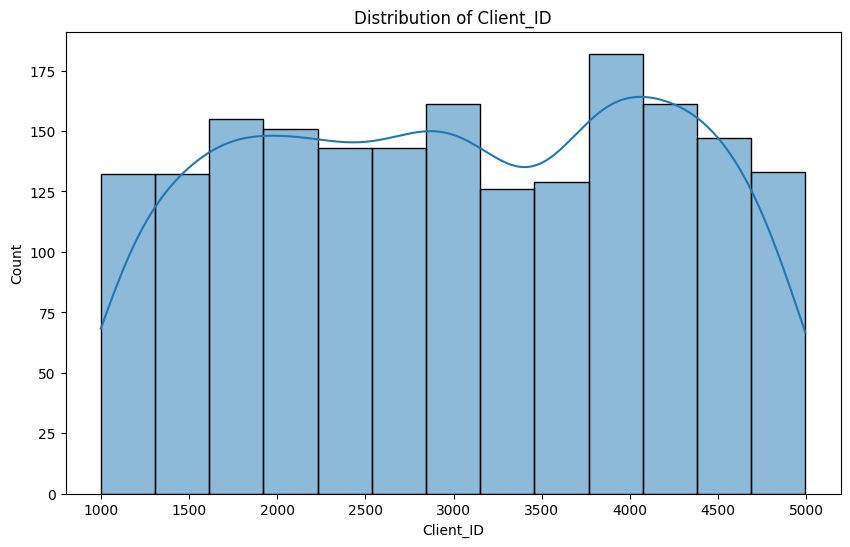

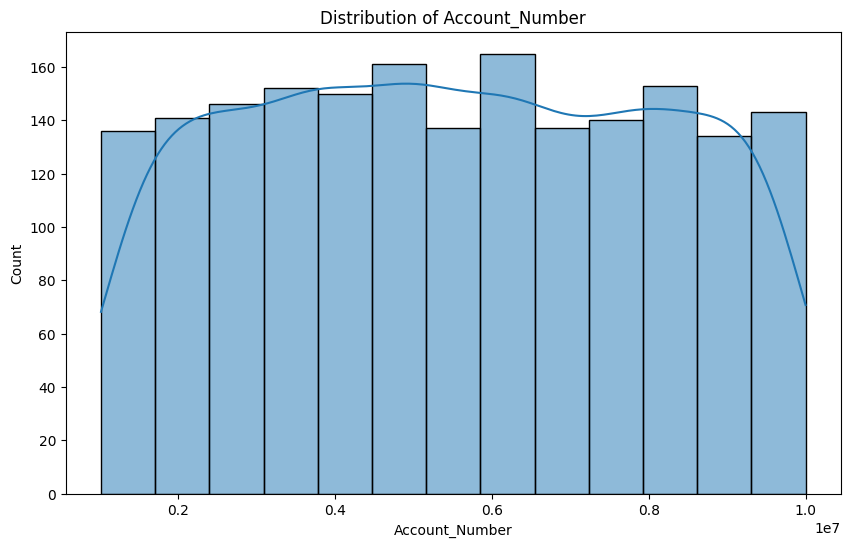

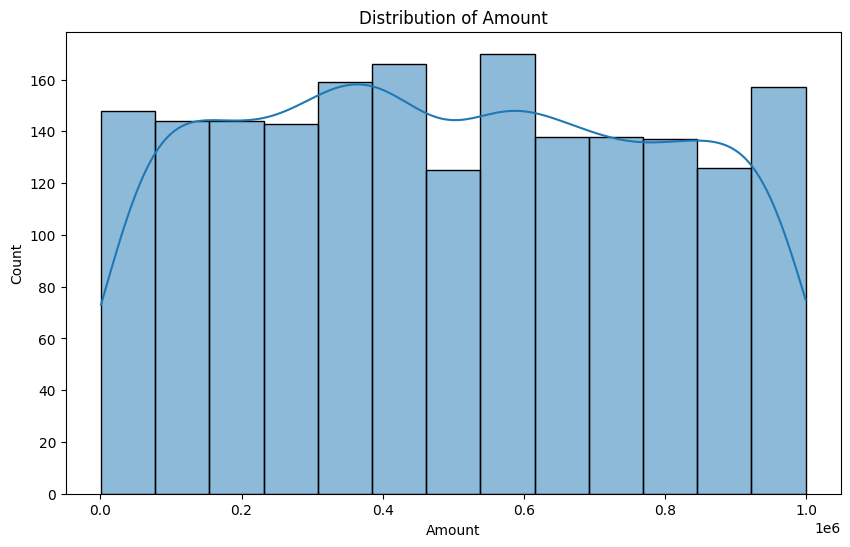

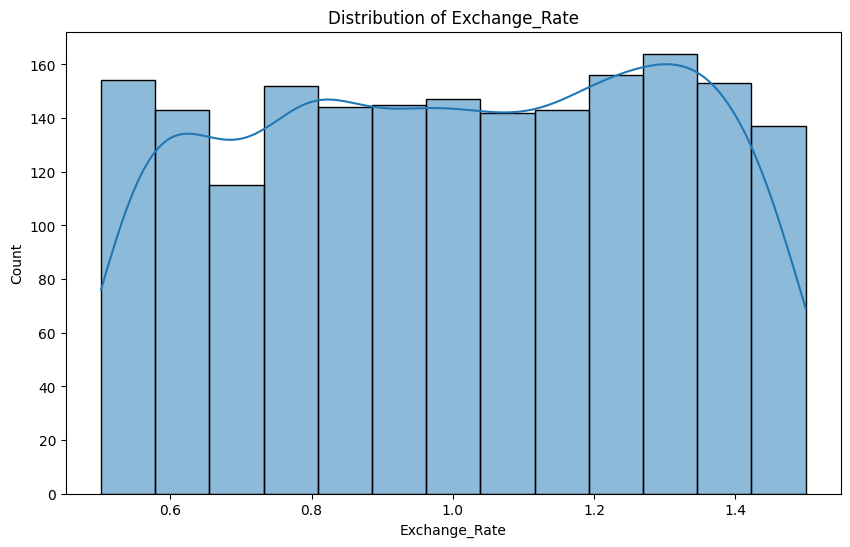

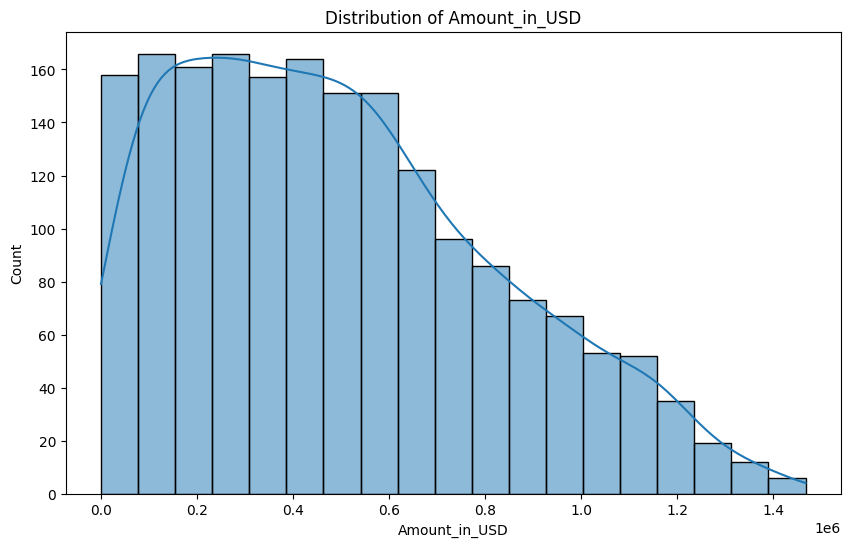

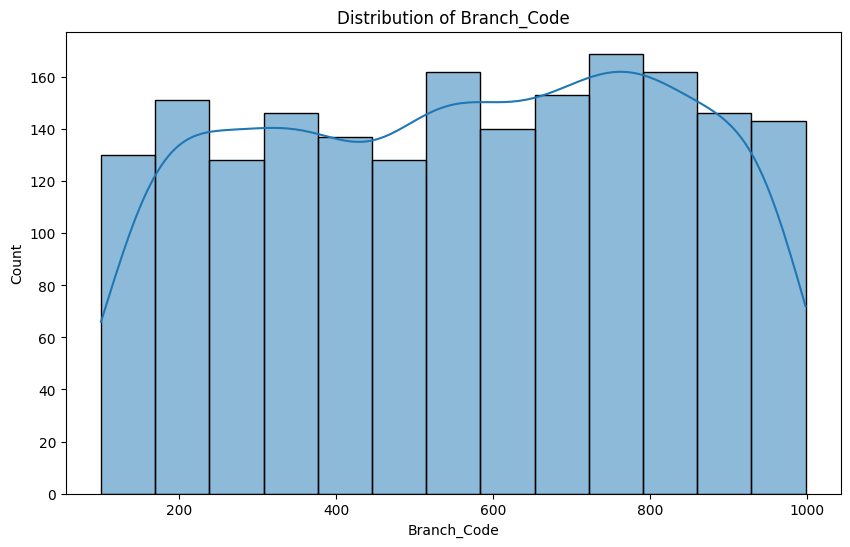

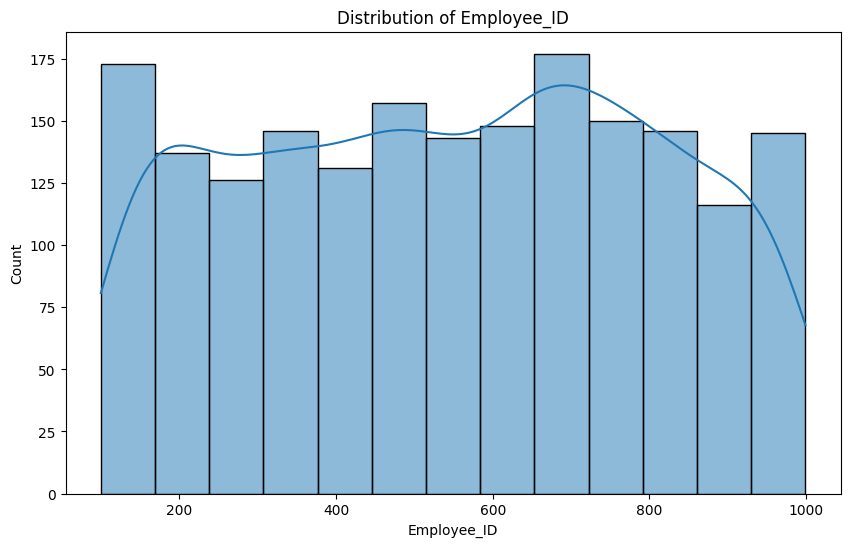

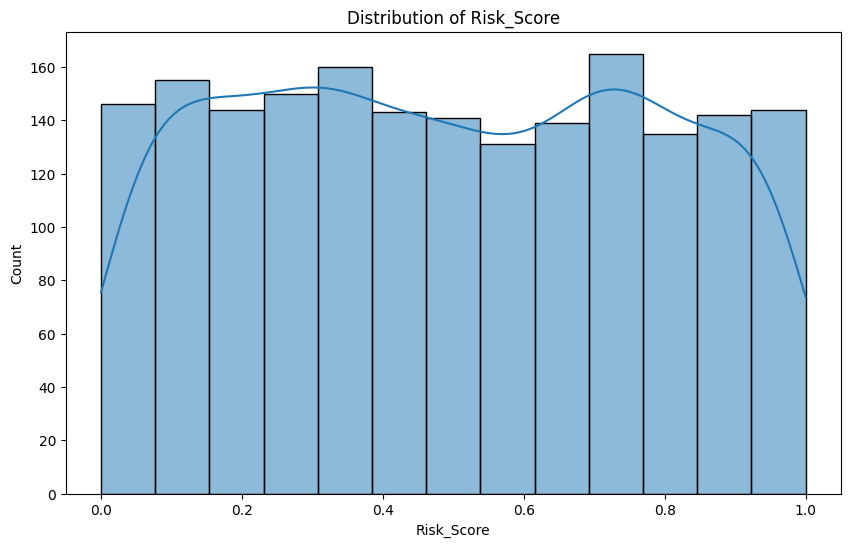

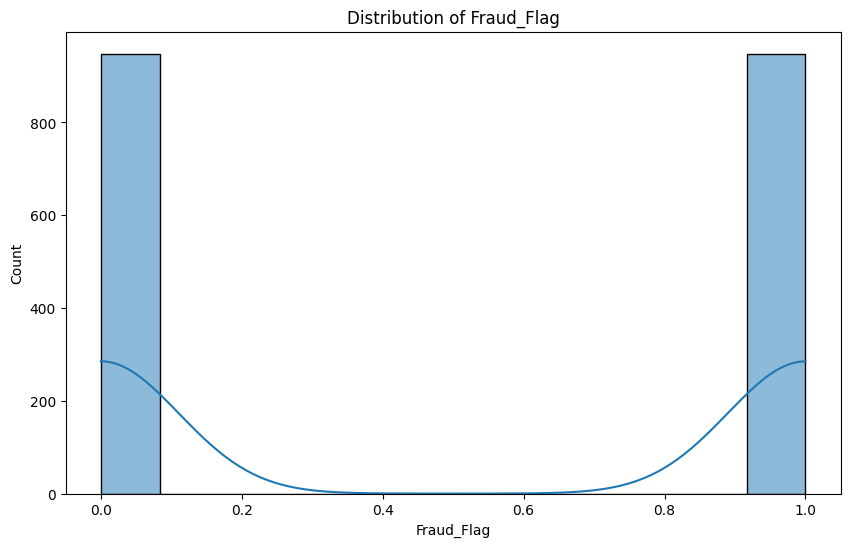

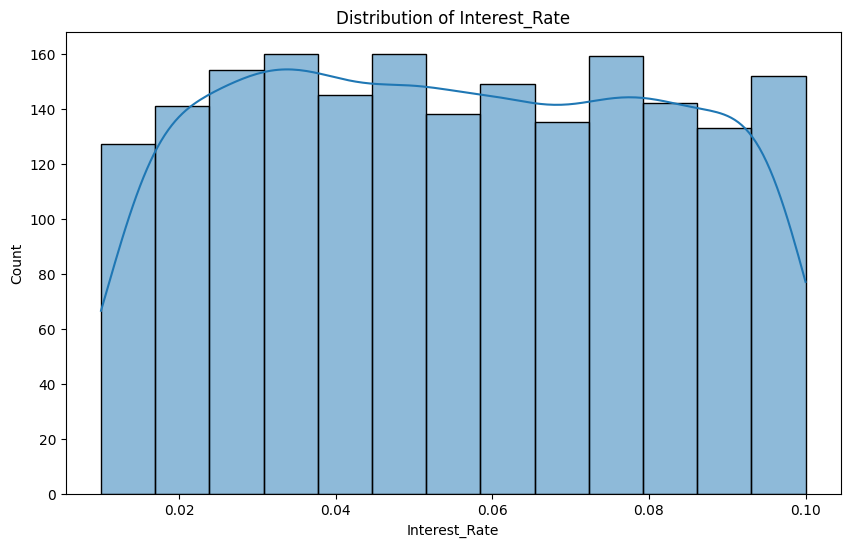

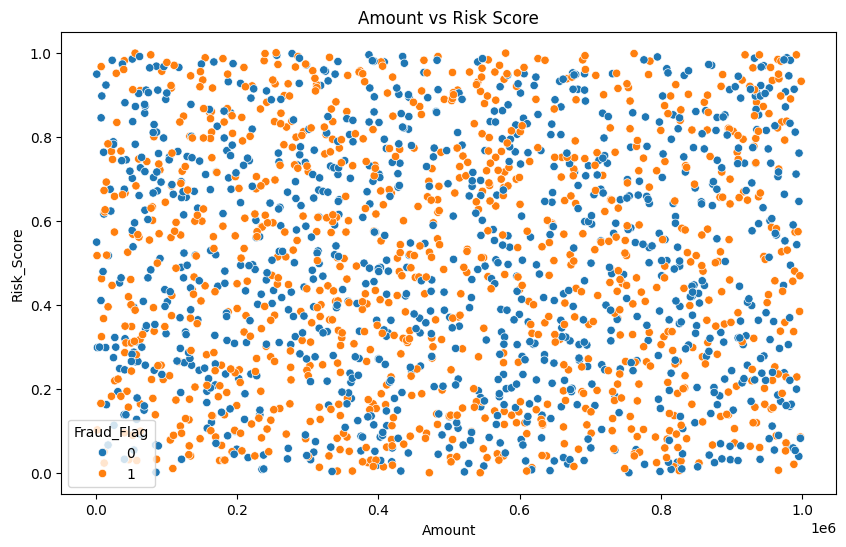

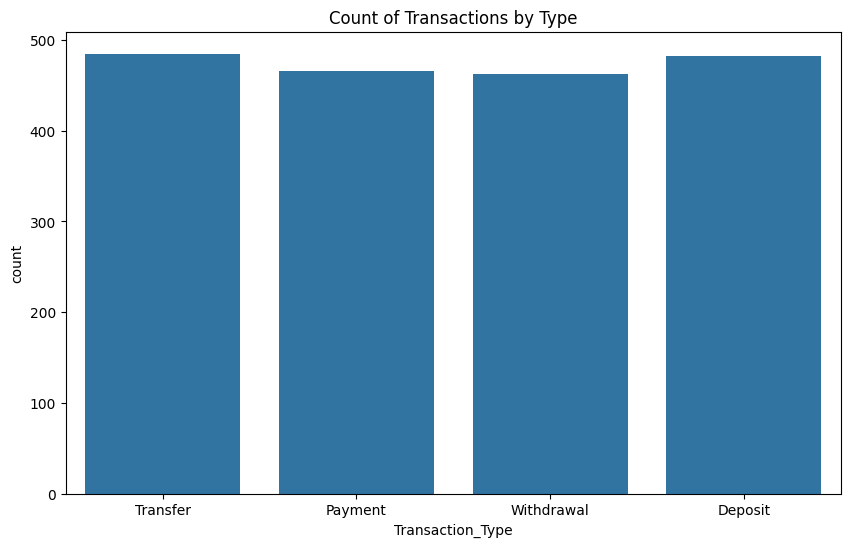

In [ ]:
# Visualize the distribution of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize the relationship between 'Amount' and 'Risk_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Risk_Score', hue='Fraud_Flag', data=df)
plt.title('Amount vs Risk Score')
plt.show()

# Visualize the count of transactions by Transaction_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction_Type', data=df)
plt.title('Count of Transactions by Type')
plt.show()

Analyzing DocumentsCertainly! Let's break down this code and explain each part in detail:

1. Visualizing the distribution of numerical columns:

```python
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
```

- This code first selects all numerical columns (integers and floats) from the DataFrame using `df.select_dtypes(include=['int64', 'float64']).columns`.
- It then iterates through each of these numerical columns.
- For each column, it creates a new figure with a size of 10x6 inches using `plt.figure(figsize=(10, 6))`.
- It uses seaborn's `histplot` function to create a histogram of the data in that column. The `kde=True` parameter adds a kernel density estimate line to the histogram.
- It sets the title of the plot to "Distribution of [column name]".
- Finally, it displays the plot using `plt.show()`.

This visualization helps to understand the distribution of values in each numerical column, which can be useful for identifying patterns, outliers, or skewness in the data.

2. Visualizing the relationship between 'Amount' and 'Risk_Score':

```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Risk_Score', hue='Fraud_Flag', data=df)
plt.title('Amount vs Risk Score')
plt.show()
```

- This code creates a new figure with a size of 10x6 inches.
- It uses seaborn's `scatterplot` function to create a scatter plot.
- The x-axis represents the 'Amount' column, and the y-axis represents the 'Risk_Score' column.
- The `hue='Fraud_Flag'` parameter colors the points based on whether they are flagged as fraud or not.
- It sets the title of the plot to "Amount vs Risk Score".
- Finally, it displays the plot.

This visualization helps to see if there's any relationship between the transaction amount and the risk score, and whether fraudulent transactions tend to have different characteristics in terms of these variables.

3. Visualizing the count of transactions by Transaction_Type:

```python
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction_Type', data=df)
plt.title('Count of Transactions by Type')
plt.show()
```

- This code creates a new figure with a size of 10x6 inches.
- It uses seaborn's `countplot` function to create a bar plot where the height of each bar represents the count of transactions for each transaction type.
- The x-axis represents different transaction types.
- It sets the title of the plot to "Count of Transactions by Type".
- Finally, it displays the plot.

This visualization helps to understand the distribution of different types of transactions in the dataset, showing which types are more common and which are less common.

These visualizations collectively provide a good initial overview of the data, helping to identify patterns, relationships, and potential areas for further investigation in the fraud detection analysis.

#Prepare Data for Decision Tree:

In [ ]:
# Select features for the decision tree
features = ['Amount', 'Risk_Score', 'Exchange_Rate', 'Interest_Rate']
# Comment: These features are selected as they likely have a strong influence on fraud detection

# Prepare X (features) and y (target variable)
X = df[features]
y = df['Fraud_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Comment: We use 80% of the data for training and 20% for testing

#Build and Train Decision Tree:

In [ ]:
# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42)
# Comment: We use DecisionTreeClassifier as it's interpretable and suitable for fraud detection

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#Validate Results:

In [ ]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5065963060686016
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       190
           1       0.50      0.54      0.52       189

    accuracy                           0.51       379
   macro avg       0.51      0.51      0.51       379
weighted avg       0.51      0.51      0.51       379



Analyzing DocumentsAnalyzing DocumentsBased on the provided image, I'll explain the results of the model evaluation:

1. Accuracy: The overall accuracy of the model is approximately 0.5066 or 50.66%. This means that the model correctly classifies about 50.66% of all transactions (both fraudulent and non-fraudulent).

2. Precision:
   - For class 0 (likely "Not Fraud"): 0.51
   - For class 1 (likely "Fraud"): 0.50
   Precision tells us the proportion of positive identifications that were actually correct. For both classes, the precision is around 50%, meaning that when the model predicts a transaction as fraudulent or non-fraudulent, it's correct about half the time.

3. Recall:
   - For class 0: 0.47
   - For class 1: 0.54
   Recall tells us the proportion of actual positives that were identified correctly. The model is slightly better at identifying fraudulent transactions (54% recall) compared to non-fraudulent ones (47% recall).

4. F1-score:
   - For class 0: 0.49
   - For class 1: 0.52
   The F1-score is the harmonic mean of precision and recall, providing a single score that balances both metrics. The model performs slightly better for fraudulent transactions (0.52) than for non-fraudulent ones (0.49).

5. Support:
   - Class 0: 190 samples
   - Class 1: 189 samples
   This indicates that the test set is well-balanced between the two classes.

6. Macro avg and Weighted avg:
   Both show values of 0.51 for precision, recall, and F1-score, which are the averages of the metrics for both classes.

Interpretation:
1. The model's performance is only slightly better than random guessing (which would have 50% accuracy for a balanced dataset).
2. The model doesn't show a strong bias towards either class, as evidenced by similar precision and recall values for both classes.
3. The balanced nature of the dataset (similar support for both classes) suggests that the model's struggles are not due to class imbalance.
4. The relatively low performance metrics suggest that the model is having difficulty distinguishing between fraudulent and non-fraudulent transactions using the given features.
5. This level of performance would not be considered satisfactory for a real-world fraud detection system, and further improvements would be necessary.

Possible next steps could include:
1. Feature engineering to create more discriminative features.
2. Trying different machine learning algorithms (e.g., Random Forest, Gradient Boosting).
3. Collecting more data or incorporating additional relevant features.
4. Investigating whether there are any patterns in the misclassifications to gain insights for improvement.

#Visualize Decision Tree:

In [ ]:
# Export the decision tree to a dot file
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=features,
                           class_names=['Not Fraud', 'Fraud'],
                           filled=True, rounded=True,
                           special_characters=True)

# Generate the decision tree visualization
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf")
# Comment: This saves the decision tree visualization as a PDF file

'decision_tree.pdf'

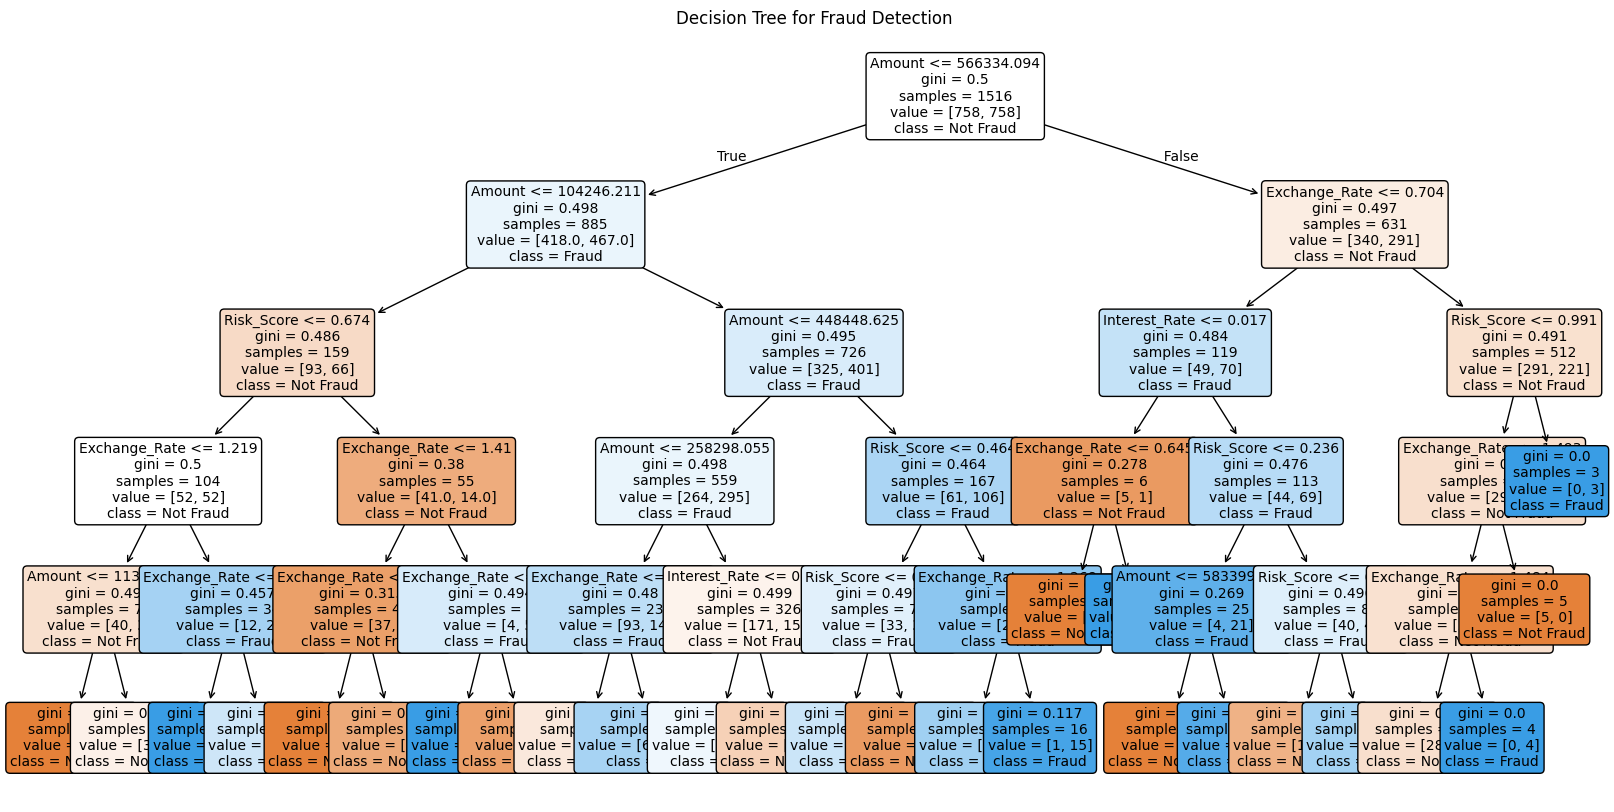

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you've already prepared your data (X_train, y_train, etc.)

# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for visibility
dt.fit(X_train, y_train)

# Create a figure with a larger size
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt,
          feature_names=X.columns,
          class_names=['Not Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Fraud Detection")
plt.show()

Analyzing DocumentsAnalyzing DocumentsBased on the decision tree image provided, I'll explain the key aspects of this fraud detection decision tree:

1. Root Node:
   - The root node splits on "Amount <= 566334.094"
   - It has 1516 samples with a perfectly balanced distribution (758 of each class)
   - Gini impurity is 0.5, indicating maximum impurity (equal distribution of classes)

2. First Level Split:
   - Left branch (Amount <= 566334.094):
     - 885 samples, slightly more fraudulent (467) than non-fraudulent (418)
     - Classified as "Fraud"
     - Gini impurity of 0.498, still quite impure
   - Right branch (Amount > 566334.094):
     - 631 samples, more non-fraudulent (340) than fraudulent (291)
     - Classified as "Not Fraud"
     - Gini impurity of 0.497, also quite impure

3. Second Level Splits:
   - Left subtree splits on "Amount <= 104246.211"
   - Right subtree splits on "Exchange_Rate <= 0.704"

4. Third Level Splits:
   - Various features are used: Risk_Score, Amount, Interest_Rate

5. Deeper Levels:
   - The tree continues to split on various features including Exchange_Rate and Risk_Score
   - As we go deeper, the number of samples in each node decreases

Key Observations:
1. Amount is the most important feature for initial classification, with the first split at 566,334.094.
2. Exchange Rate, Risk Score, and Interest Rate also play significant roles in fraud detection.
3. The tree is quite deep, suggesting complex decision rules for fraud detection.
4. Many nodes, even at lower levels, still have mixed classes, indicating the complexity of the fraud detection problem.

This decision tree provides a hierarchical set of rules for classifying transactions as fraudulent or not, based primarily on the transaction amount, exchange rate, risk score, and interest rate. The model seems to capture complex interactions between these features to make its predictions.

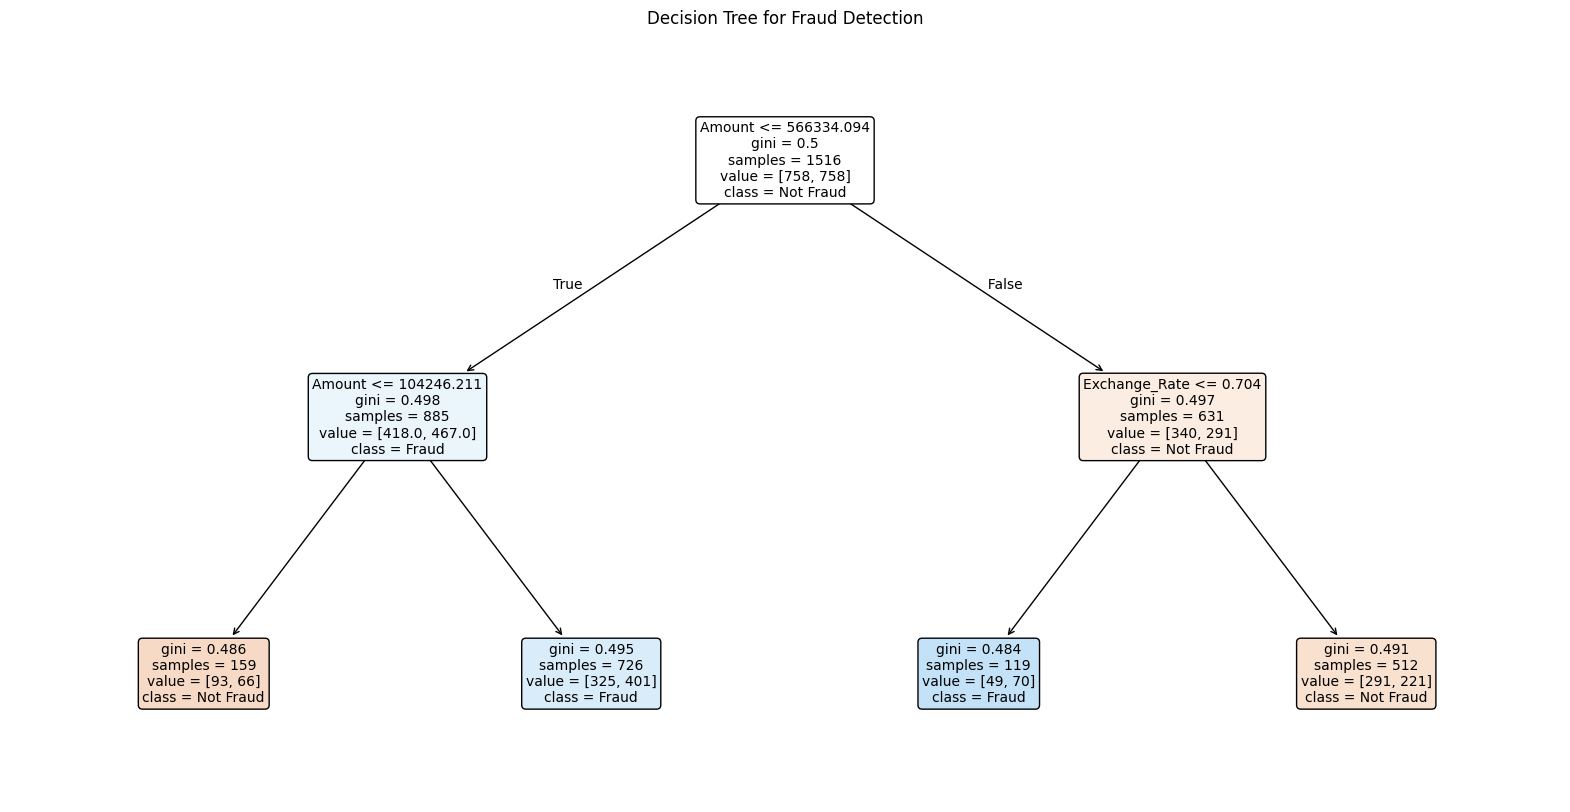

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you've already prepared your data (X_train, y_train, etc.)

# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=2)  # Limiting depth for visibility
dt.fit(X_train, y_train)

# Create a figure with a larger size
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt,
          feature_names=X.columns,
          class_names=['Not Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Fraud Detection")
plt.show()

Accuracy: 0.45118733509234826
              precision    recall  f1-score   support

           0       0.45      0.42      0.43       190
           1       0.45      0.49      0.47       189

    accuracy                           0.45       379
   macro avg       0.45      0.45      0.45       379
weighted avg       0.45      0.45      0.45       379



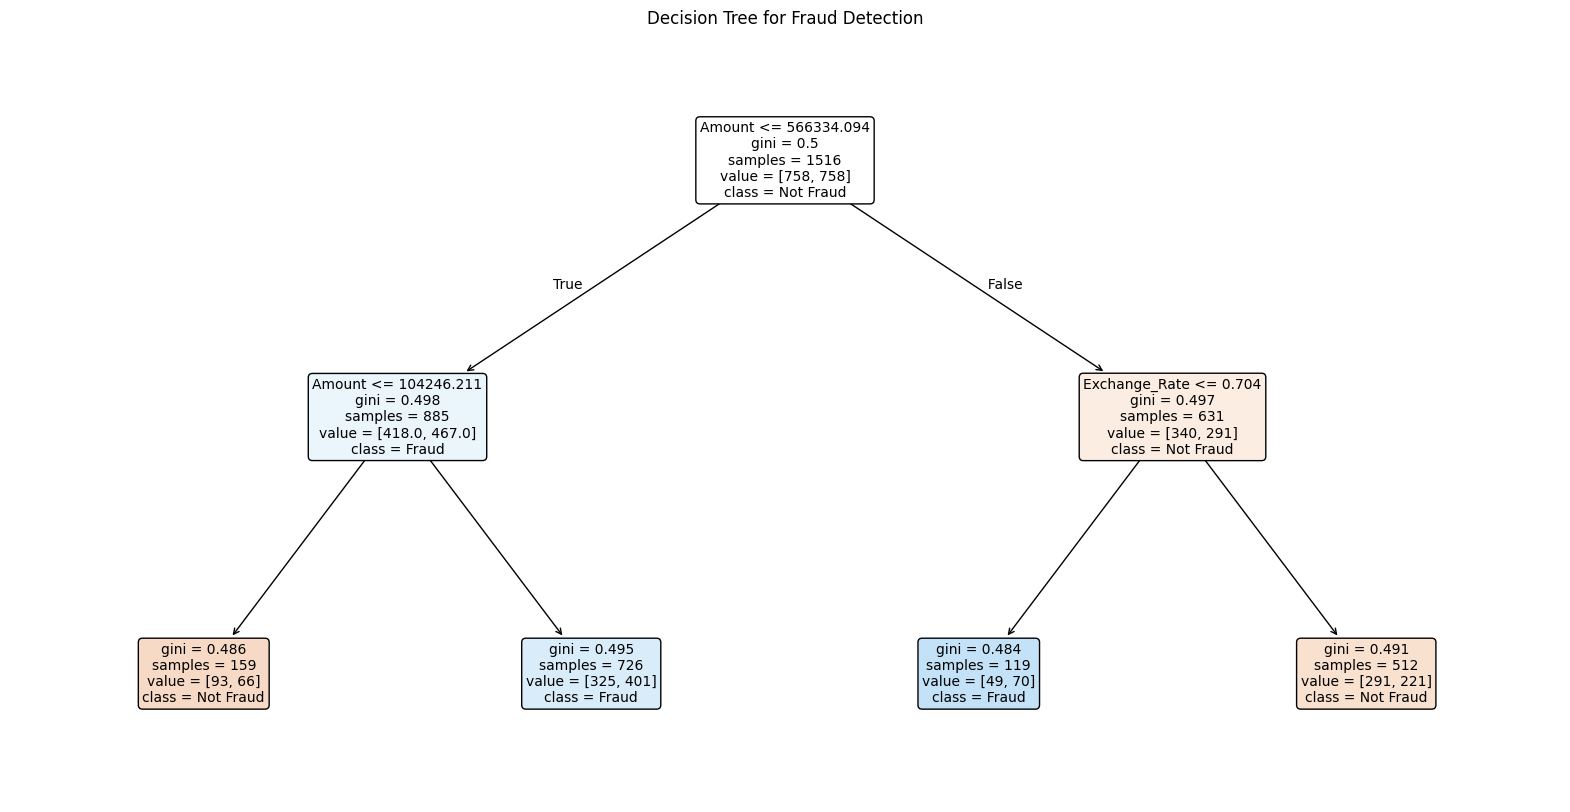

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Assuming you have already loaded your data into the 'df' DataFrame as in your previous code.
# ... (Your data loading and preprocessing code) ...


# Select features and target
features = ['Amount', 'Risk_Score', 'Exchange_Rate', 'Interest_Rate']
X = df[features]
y = df['Fraud_Flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=2)  # Limit depth for better visualization
dt.fit(X_train, y_train)


# Evaluate the model
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=['Not Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Fraud Detection")
plt.show()

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier # Import MLPClassifier

# Load the data (assuming your CSV file is in the same directory as the notebook)
df = pd.read_csv('CIB_synthetic_data (1).csv')

# Select features and target
features = ['Amount', 'Risk_Score', 'Exchange_Rate', 'Interest_Rate']
X = df[features]
y = df['Fraud_Flag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) # Adjust parameters as needed
mlp.fit(X_train, y_train)


# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5013192612137203
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       190
           1       0.00      0.00      0.00       189

    accuracy                           0.50       379
   macro avg       0.25      0.50      0.33       379
weighted avg       0.25      0.50      0.33       379



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
